In [1]:
import math
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.size'] = 17

In [2]:
def read_data():
    vacf_all = []
    vacf_1 = []
    vacf_2 = []
    check = 1
    
    M1 = 238.03**(1/2.0)
    M2 = 95.95**(1/2.0)
    
    fi = open(path+'DOS.out', 'r')
    for k in range(100000):
        st = fi.readline()
        #print(st[0:4])
        if st[0:4] == "Step":
            check = check + 1
            print(check)
        if check == 3:
            break
    for k in range(t_vacf):
        st = fi.readline()
        if st[0:4] == "Loop":
            break
        data = st.rstrip().split()
        #print(st)
        vacf_all.append([float(data[0])*step-t0,float(data[8])])
        #vacf_1.append([float(data[0])*step-t0,float(data[9])])
        #vacf_2.append([float(data[0])*step-t0,float(data[10])])
    fi.close()

    vacf_all = np.asmatrix(vacf_all)
    #vacf_1 = np.asmatrix(vacf_1)
    #vacf_2 = np.asmatrix(vacf_2)
    
    v = np.copy(vacf_all[0,1])
    #v1 = np.copy(vacf_1[0,1])
    #v2 = np.copy(vacf_2[0,1])
    print("len of all vacf", vacf_all.shape)
    for i in range(len(vacf_all)):
        vacf_all[i,1] = (M1**2*vacf_all[i,1])/(M1**2*v)
        #vacf_1[i,1] = (M1**2*vacf_1[i,1])/(M1**2*v1 + M2**2*v2)
        #vacf_2[i,1] = (M2**2*vacf_2[i,1])/(M1**2*v1 + M2**2*v2)

    
    fo = open('VACF.dat','w')
    fo.write('Time, ps Autocorr \n')
    for i in range(len(vacf_all)):
        fo.write('%f %f \n' % (vacf_all[i,0],vacf_all[i,1]))
    fo.close()
    
    #fo = open('VACF_1.dat','w')
    #fo.write('Time, ps Autocorr \n')
    #for i in range(len(vacf_1)):
    #    fo.write('%f %f \n' % (vacf_1[i,0],vacf_1[i,1]))
    #fo.close()
    #fo = open('VACF_2.dat','w')
    #fo.write('Time, ps Autocorr \n')
    #for i in range(len(vacf_2)):
    #    fo.write('%f %f \n' % (vacf_2[i,0],vacf_2[i,1]))
    #fo.close()
    return vacf_1, vacf_2, vacf_all

In [3]:
def PDOS(vacf,v,nAt):
    gr = 0
    gr = np.sum(np.multiply(np.cos(2*3.141592654*v*vacf[:,0]),vacf[:,1])*step)
	#for i in range(vacf.shape[0]):
#		gr = gr + math.cos(2*3.141592654*v*vacf[i,0])*vacf[i,1]*step
	#l = vacf.shape[0]
	#gr = np.sum(math.cos(2*3.141592654*np.repeat(v,l)*vacf[:,0])*vacf[:,1]*np.repeat(step,l))
    return gr#*nAt/(nAt1+nAt2)

In [4]:
def integ(pdos):
	sum = 0
	vcut = freq[-1]
	for i in range(len(pdos)):
		sum = sum + pdos[i][1]*(freq[1]-freq[0])
		if sum > 1:
			vcut = pdos[i][0]
			break
	print("Integral =", sum)
	print ("vcut =", vcut)
	return vcut, sum

In [5]:
def write_vacf(vacf, pdos_name, nAt):
    p = []
    for v in freq:
        p_tmp = PDOS(vacf,v,nAt)
        if v == 0:
            p0 = p_tmp
        p_tmp = p_tmp - p0
        p.append([v,p_tmp])

    vc, integral  = integ(p)
    #print(vc, integral)
    #p2 = [[x[0],x[1]*1.0/integral] for x in p]
    p2 = [[x[0],x[1]*1.0] for x in p]

    fo = open(pdos_name,'w')
    for x in p2:
        fo.write("%f %f \n" % (x[0], x[1]))
    fo.close()
    return p2

In [6]:
dnu = 0.05
freq = np.array([i*dnu for i in range(0,800)])
mask_value = re.compile('[+-]?\d+\.?\d*e?[+-]?\d*')
#mask_line = re.compile('temperature\s*\d+')
mask_energy = re.compile('\s+0\s+0\s*\d+')

step = 0.001
t0 = 0
t_vacf = 3000
type1 = 'Al'
type2 = 'Mo'

n = 20
c = 0
nAt = 4*n*n*n
nAt1 = nAt*(100-c)/100
nAt2 = nAt*c/100
path = "./"

In [7]:
vacf_1, vacf_2, vacf_all = read_data()

2
3
len of all vacf (5000, 2)


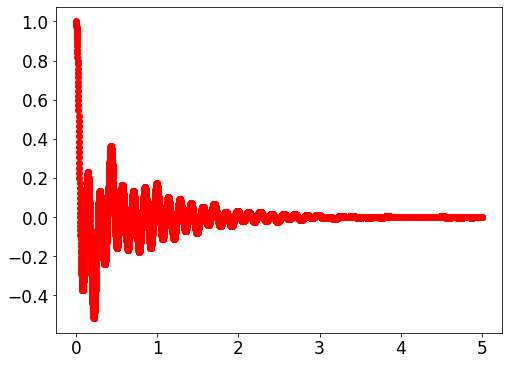

In [8]:
fig = plt.figure(figsize=(8,6))
plt.plot(vacf_all[:,0], vacf_all[:,1], 'or')
#plt.plot(vacf_1[:,0], vacf_1[:,1], 'ob')
#plt.plot(vacf_2[:,0], vacf_2[:,1], 'og')
plt.show()

In [9]:
#write_vacf(vacf_all, path+'PDOS_all.dat')
pdos_all = np.asmatrix(write_vacf(vacf_all, path+'PDOS_{0}.dat'.format('all'), nAt))
#pdos1 = np.asmatrix(write_vacf(vacf_1, path+'PDOS_{0}.dat'.format(type1), nAt1))
#pdos2 = np.asmatrix(write_vacf(vacf_2, path+'PDOS_{0}.dat'.format(type2), nAt2))
import copy

#pdos_total = copy.deepcopy(pdos1)
#pdos_total[:,1] += pdos2[:, 1]
#0.7391632209175192+0.18972116869799943


Integral = 0.2550587657809024
vcut = 39.95


In [10]:
def thermo(freq, T):
    return freq/(kb*T)/(1 - np.exp(-freq/(kb*T)))

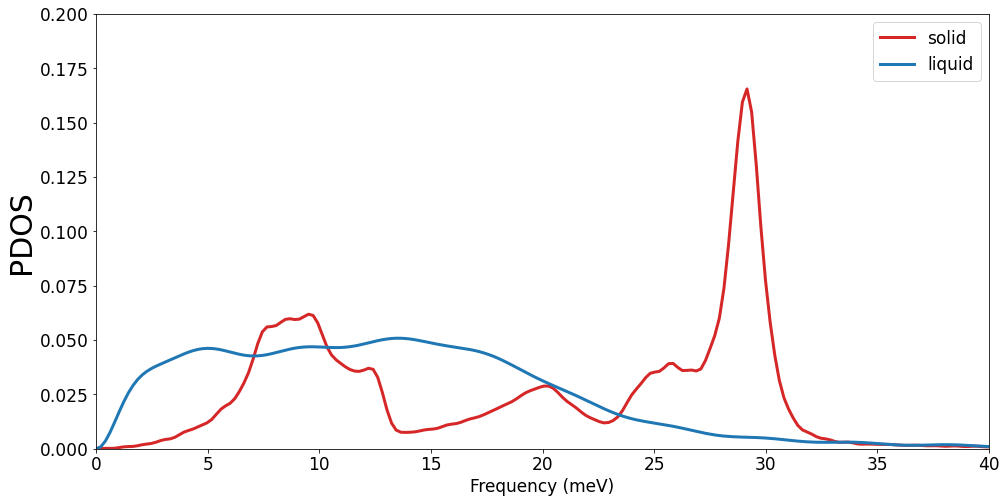

In [13]:
fig =plt.figure(figsize=(16,8))

#PDOS_liq = np.genfromtxt("../liquid/PDOS.dat")
#PDOS_sol = np.genfromtxt("./PDOS.dat")
gamma = 0.80*2

def lorenc(x, A, gamma, x0):
    return A*(1/2.*gamma)**2/((x - x0)**2 + 1/4.*gamma**2)

Lgamma0 = lambda x: lorenc(x, pdos_all[0,1], gamma, 0)

ax = fig.add_subplot(111)

x_lor = np.array(pdos_all[:, 0])[:, 0]
y_lor = np.array([Lgamma0(el) for el in x_lor])

pdos_all_x = np.array(pdos_all[:200, 0])[:, 0]
pdos_all_y = np.array(pdos_all[:200, 1])[:, 0]
#pdos_all_y[1:] *= thermo(pdos_all_x, 955.7)[1:]

integral = riemannint(pdos_all_y, 0.05*4.136)

pdos_all_y /= integral
pdos_all_x *= 4.136
#ax.plot(x_lor, y_lor)
ax.plot(pdos_all_x, pdos_all_y, color='tab:red', label='{}'.format('solid'), linewidth=3)
#ax.plot(PDOS_liq[:, 0], PDOS_liq[:, 1], color='tab:blue', label='{}'.format('liquid'), linewidth=3)
#ax.plot(PDOS_sol[:, 0], PDOS_sol[:, 1]/10, color='tab:green', label='{}'.format('liquid'), linewidth=3)
#ax.plot(pdos_all[1:,0]*4.136, pdos_new[:]*4.136, color='tab:red', label='PDOS_{}'.format('all'), linewidth=3)
#plt.plot(pdos[:, 0], pdos[:, 1])

#ax.plot(pdos1[:,0], pdos1[:,1], color='tab:blue', label='PDOS_{0}'.format(type1), linewidth=3)
#ax.plot(pdos2[:,0], pdos2[:,1], color='tab:orange', label='PDOS_{0}'.format(type2), linewidth=3)
#ax.plot(pdos_total[:,0], pdos_total[:, 1], color='indianred', label='total PDOS', linewidth=3)
#ax.plot(PDOS[:, 0]/0.24180, PDOS[:, 1])
#ax.fill_between(np.squeeze(np.asarray(pdos1[:,0])), 0, np.squeeze(np.asarray(pdos_total)), facecolor='tab:olive', label = 'Total PDOS')
plt.xlabel('Frequency (meV)')
plt.ylabel('PDOS', fontsize = 30)
plt.xlim(0,40)
plt.ylim(0,0.2)
#plt.ylim(0,0.5)
#plt.xscale([0, 12/0.24180])
#plt.ylim(0,0.1)
plt.legend()
plt.savefig(path+"{0}_pdos.jpg".format(type1, type2), dpi=300)
plt.show()

In [19]:
#np.savetxt("../../../Melting/Ge/liquid/PDOS_liquid.txt", PDOS_liq)
np.savetxt("./PDOS_solid.txt", np.vstack([pdos_all_x, pdos_all_y]).T)

In [12]:
def riemannint(f,dx):
    """Compute Riemann integral"""
    return np.sum(f)*dx


In [57]:
pdos_all_y /= riemannint(pdos_all_y, 0.05*4.136)

In [58]:
print(pdos_all[17,1]/pdos_all[0,1])
print(pdos_all[17,0])

inf
0.8500000000000001


/var/folders/p2/mwhbpbfx4dx636dcf50t7_rr0000gn/T/ipykernel_91226/1320560247.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  print(pdos_all[17,1]/pdos_all[0,1])


In [59]:
gamma = pdos_all[17,0]*2

def lorenc(x, A, gamma, x0):
    return A*(1/2.*gamma)**2/((x - x0)**2 + 1/4.*gamma**2)

Lgamma0 = lambda x: lorenc(x, pdos_all[0,1], gamma, 0)
print(Lgamma0(0))

0.0


In [60]:
from scipy.constants import physical_constants

def thermal_factor(freq, T):
    kb = physical_constants['Boltzmann constant in eV/K'][0]*1000
    return 1/np.expm1(freq/(kb*T))

thermo = thermal_factor(pdos_all[1:,0], 1100)
print(thermo.shape)
pdos_new = np.zeros(len(pdos_all[1:,1]))
for i in range(len(pdos_all[1:,1])):
    pdos_new[i] = pdos_all[1+i,1]*thermo[i, 0]

(799, 1)


In [61]:
T = 955.7

kb = 8.6*10**(-2)

def thermo(freq, T):
    return freq/(kb*T)/(1 - np.exp(-freq/(kb*T)))

/var/folders/p2/mwhbpbfx4dx636dcf50t7_rr0000gn/T/ipykernel_91226/3146321756.py:6: RuntimeWarning: invalid value encountered in true_divide
  return freq/(kb*T)/(1 - np.exp(-freq/(kb*T)))


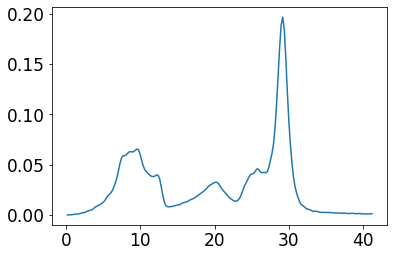

In [62]:
plt.plot(pdos_all_x, pdos_all_y*thermo(pdos_all_x, 955.7))

In [63]:
np.reshape(thermo, (len(thermo), )).shape

TypeError: object of type 'function' has no len()

In [64]:
np.savetxt("./PDOS.dat", pdos_all)

In [65]:
np.savetxt("./PDOS_mix.dat", pdos_all)
np.savetxt("./PDOS_unmix.dat", pdos_total)

np.savetxt("./PDOS_U.dat", pdos1)
np.savetxt("./PDOS_Mo.dat", pdos2)


NameError: name 'pdos_total' is not defined

In [14]:
vc = 40
T = 978

kb = 8.6*10**(-2)

def n(eps,T):
        return 1/(2.71828**(eps/(kb*T))-1)

def entropy(pdos_x,pdos_y,vcut):
        ent = 0
        for i in range(1, len(pdos_x)-1):
                if pdos_x[i] > vcut:
                        break
                eps = pdos_x[i]
                eps_new = pdos_x[i+1]
                deps = eps_new - eps
                print(eps)
                ent = ent + ((n(eps,T)+1)*math.log(n(eps,T)+1)-n(eps,T)*math.log(n(eps,T)))*pdos_y[i]*deps
        
        print("Entropy/atom = %f kb" % (3*ent))
        return 3*ent

#pdos = np.genfromtxt('./PDOS.dat')

entropy(pdos_all_x, pdos_all_y,vc)


0.2068
0.4136
0.6204000000000001
0.8272
1.034
1.2408000000000001
1.4476000000000002
1.6544
1.8612000000000002
2.068
2.2748000000000004
2.4816000000000003
2.6884
2.8952000000000004
3.1020000000000003
3.3088
3.5156000000000005
3.7224000000000004
3.9292000000000002
4.136
4.3428
4.549600000000001
4.756400000000001
4.9632000000000005
5.17
5.3768
5.583600000000001
5.790400000000001
5.997200000000001
6.204000000000001
6.4108
6.6176
6.824400000000001
7.031200000000001
7.238
7.444800000000001
7.6516
7.8584000000000005
8.0652
8.272
8.478800000000001
8.6856
8.8924
9.099200000000002
9.306000000000001
9.512800000000002
9.7196
9.926400000000001
10.1332
10.34
10.546800000000001
10.7536
10.960400000000002
11.167200000000001
11.374
11.580800000000002
11.787600000000001
11.994400000000002
12.201200000000002
12.408000000000001
12.6148
12.8216
13.028400000000001
13.2352
13.442
13.648800000000001
13.8556
14.062400000000002
14.269200000000001
14.476
14.682800000000002
14.889600000000002
15.096400000000003
1

7.7411965101523705

In [15]:
riemannint(pdos_all_y, pdos_all_x[1] - pdos_all_x[0])

1.0000000000000002

In [16]:
entropy(PDOS_liq[:, 0], PDOS_liq[:, 1],vc)

0.2068
0.4136
0.6204000000000001
0.8272
1.034
1.2408000000000001
1.4476000000000002
1.6544
1.8612000000000002
2.068
2.2748000000000004
2.4816000000000003
2.6884
2.8952000000000004
3.1020000000000003
3.3088
3.5156000000000005
3.7224000000000004
3.9292000000000002
4.136
4.3428
4.549600000000001
4.756400000000001
4.9632000000000005
5.17
5.3768
5.583600000000001
5.790400000000001
5.997200000000001
6.204000000000001
6.4108
6.6176
6.824400000000001
7.031200000000001
7.238
7.444800000000001
7.6516
7.8584000000000005
8.0652
8.272
8.478800000000001
8.6856
8.8924
9.099200000000002
9.306000000000001
9.512800000000002
9.7196
9.926400000000001
10.1332
10.34
10.546800000000001
10.7536
10.960400000000002
11.167200000000001
11.374
11.580800000000002
11.787600000000001
11.994400000000002
12.201200000000002
12.408000000000001
12.6148
12.8216
13.028400000000001
13.2352
13.442
13.648800000000001
13.8556
14.062400000000002
14.269200000000001
14.476
14.682800000000002
14.889600000000002
15.096400000000003
1

9.226014595227145

In [37]:
riemannint(PDOS_liq[:, 1], 0.05*4.136)

0.9999999999999999

In [69]:
9.226014595227145 - 7.7411965101523705

1.4848180850747745

In [30]:
riemannint(PDOS_liq[:, 1], 0.05*4.136)

0.9999999999999999

In [82]:
pdos = np.genfromtxt('./PDOS.dat')
pdos

array([[0.0000000e+00, 5.7845700e-05],
       [1.0000000e-01, 9.1097710e-04],
       [2.0000000e-01, 2.8613829e-03],
       ...,
       [5.9800000e+01, 0.0000000e+00],
       [5.9900000e+01, 0.0000000e+00],
       [6.0000000e+01, 0.0000000e+00]])

In [60]:
3.6171 - (9.026201655222309 - 7.593885176102553)

2.1847835208802446

In [39]:
np.squeeze(np.asarray(pdos_total))

NameError: name 'pdos_total' is not defined

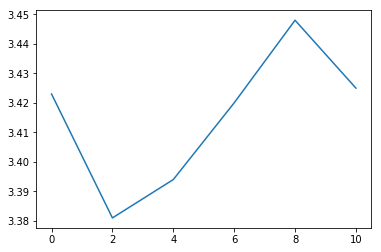

In [12]:
x_s = [0, 2, 4,6,8, 10]
s = [3.423, 3.381, 3.394, 3.420, 3.448, 3.425]

plt.plot(x_s, s)

In [32]:
pdos = np.genfromtxt('PDOS.dat')

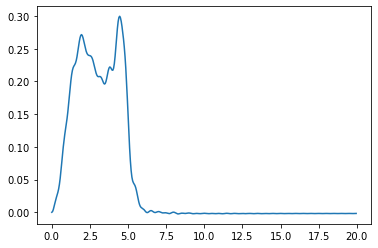

In [33]:
plt.plot(pdos[:, 0], pdos[:, 1])


In [41]:
import numpy as np
import copy
from gmpy2 import mpfr, get_context
get_context().precision=400

from GPPhad import create_from_scratch, retrain, consts
from GPPhad import cov_real, GP_full, print_point

ModuleNotFoundError: No module named 'GPPhad'

In [40]:
from numpy import random

a = random.normal(0, 1, 10000)*5

In [43]:
a.std()

4.9959501936605815

In [50]:
T = 300
kb = 8.6*10**(-2)

def thermo_1(freq, T):
    return freq/(kb*T)/(1 - np.exp(-freq/(kb*T)))

def thermo_2(freq, T):
    return freq/(1 - np.exp(-freq/(kb*T))) - 0.0001/(1 - np.exp(-0.0001/(kb*T)))

In [51]:
freq = np.linspace(0, 60, 200)

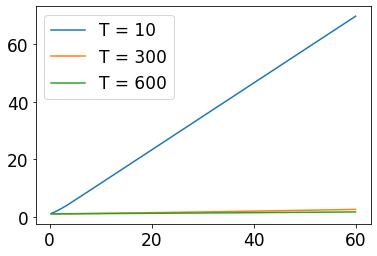

In [57]:
plt.plot(freq[1:], thermo_1(freq[1:], 10), label = 'T = 10')
plt.plot(freq[1:], thermo_1(freq[1:], 300), label = 'T = 300')
plt.plot(freq[1:], thermo_1(freq[1:], 600), label = 'T = 600')

plt.legend()

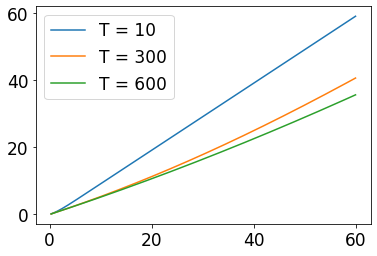

In [56]:
plt.plot(freq[1:], thermo_2(freq[1:], 10), label = 'T = 10')
plt.plot(freq[1:], thermo_2(freq[1:], 300), label = 'T = 300')
plt.plot(freq[1:], thermo_2(freq[1:], 600), label = 'T = 600')

plt.legend()